# Import Library

Pada bagian ini kita mengimport library yang digunakan pada proyek.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

# Data Loading

Pada bagian ini kita mengakses data yang akan digunakan pada proyek. Dataset ini dapat ditemukan pada https://www.kaggle.com/datasets/prokshitha/home-value-insights/data.

In [4]:
df = pd.read_csv('/content/house_price_regression_dataset.csv')

# Exploratory Data Analysis

Pada bagian ini kita akan melakukan Exploratory Data Analysis (EDA), yang merupakan proses investigasi awal pada data untuk menganalisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data.

**Deskripsi Variabel**

In [5]:
# See first five rows of the data columns
df.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


Menggunakan info dari Kaggle, pada dataset ini terdapat 8 fitur, yaitu:

- Square_Footage: Ukuran rumah dalam kaki persegi. Rumah yang lebih besar biasanya memiliki harga yang lebih tinggi.

- Num_Bedrooms: Jumlah kamar tidur di rumah. Lebih banyak kamar tidur umumnya meningkatkan nilai rumah.

- Num_Bathrooms: Jumlah kamar mandi di rumah. Rumah dengan lebih banyak kamar mandi biasanya memiliki harga yang lebih tinggi.

- Year_Built: Tahun rumah dibangun. Rumah yang lebih tua mungkin memiliki harga yang lebih rendah karena keausan.

- Lot_Size: Ukuran tanah tempat rumah dibangun, diukur dalam hektar. Tanah yang lebih besar cenderung menambah nilai properti.

- Garage_Size: Jumlah mobil yang dapat muat di garasi. Rumah dengan garasi yang lebih besar biasanya lebih mahal.

- Neighborhood_Quality: Peringkat kualitas lingkungan pada skala 1-10, di mana 10 menunjukkan lingkungan yang berkualitas tinggi. Lingkungan yang lebih baik biasanya memiliki harga yang lebih tinggi.

- House_Price (Variabel Target): Harga rumah, yang merupakan variabel dependen yang ingin diprediksi.

In [9]:
# See general info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Square_Footage        1000 non-null   int64  
 1   Num_Bedrooms          1000 non-null   int64  
 2   Num_Bathrooms         1000 non-null   int64  
 3   Year_Built            1000 non-null   int64  
 4   Lot_Size              1000 non-null   float64
 5   Garage_Size           1000 non-null   int64  
 6   Neighborhood_Quality  1000 non-null   int64  
 7   House_Price           1000 non-null   float64
dtypes: float64(2), int64(6)
memory usage: 62.6 KB


Dapat dilihat bahwa terdapat 1000 baris dari 8 kolom data numerik, dengan tidak ada data null atau hilang, dan jenis data berupa int64 (6 fitur) dan float64 (2 fitur).

In [7]:
# See general statistics of dataset
df.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


Fungsi describe() memberikan informasi statistik pada masing-masing kolom, antara lain:

- Count  adalah jumlah sampel pada data.
- Mean adalah nilai rata-rata.
- Std adalah standar deviasi.
- Min yaitu nilai minimum setiap kolom.
- 25% adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- 50% adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
- 75% adalah kuartil ketiga.
- Max adalah nilai maksimum.

**Menangani Missing Value**

In [8]:
# Check for missing values
df.isnull().sum()

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


Seperti dilihat dari df.info(), tidak ada missing value, sehingga tidak perlu diatasi.

**Menangani Outlier**

In [11]:
# Define IQR method to find outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [12]:
# Find outliers using IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
outliers

,0
Square_Footage,0
Num_Bedrooms,0
Num_Bathrooms,0
Year_Built,0
Lot_Size,0
Garage_Size,0
Neighborhood_Quality,0
House_Price,0


Menggunakan metode IQR, dapat dilihat bahwa tidak terdapat outlier pada dataset ini.

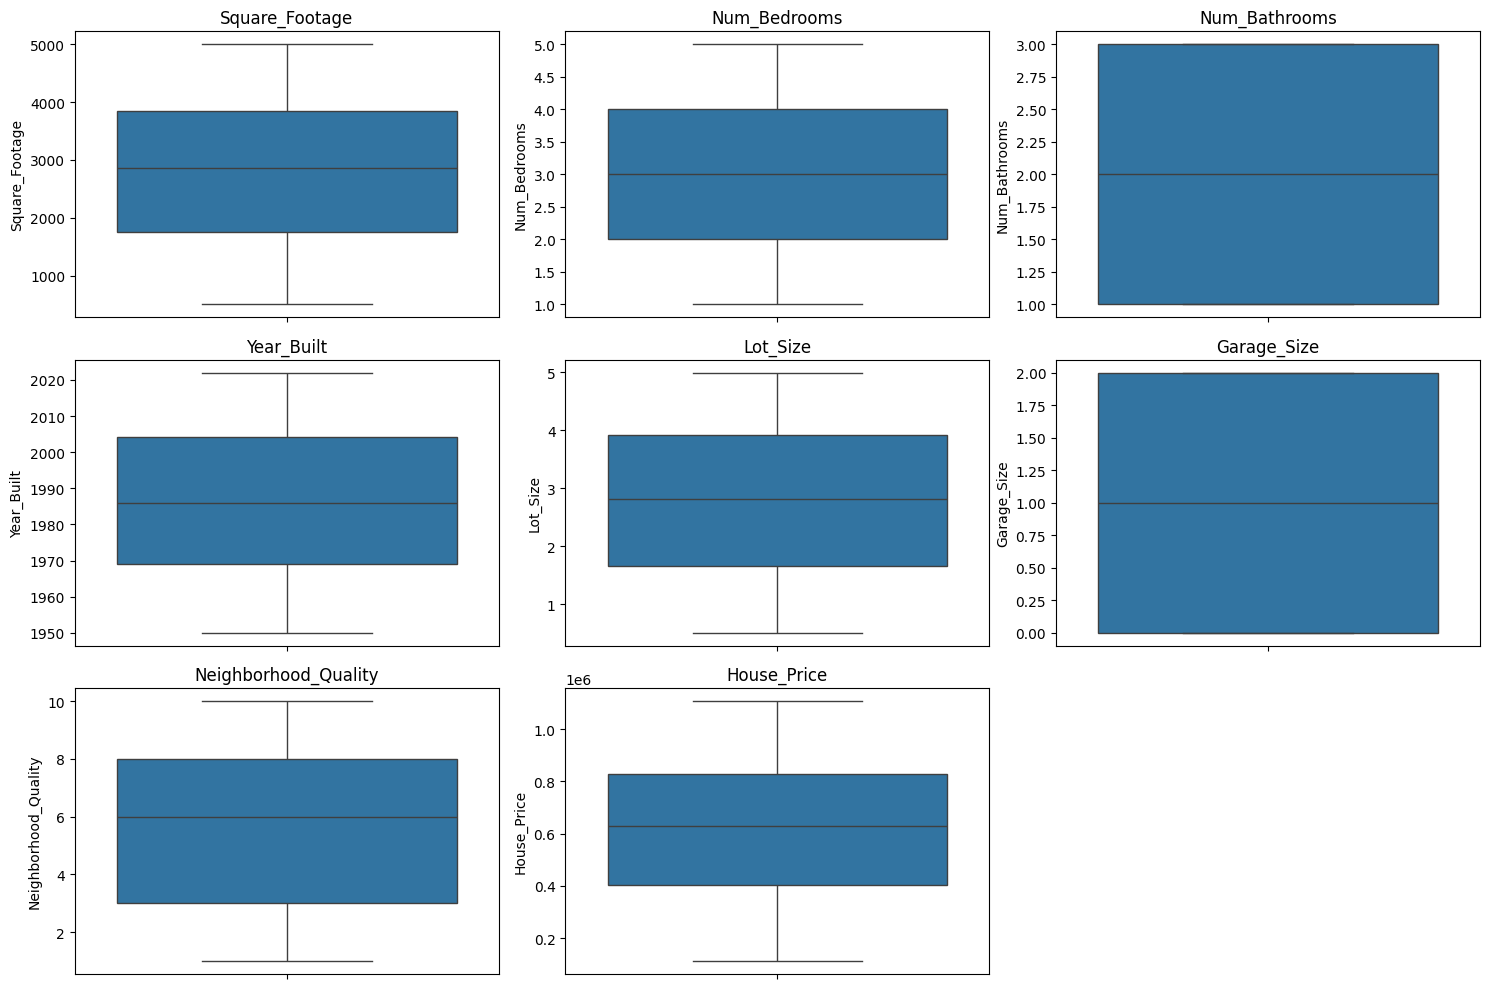

In [10]:
# Create a boxplot for each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

Visualisasi distribusi data menggunakan boxplot. Dapat dilihat bahwa tidak terdapat outlier pada data.

**Univariate Analysis**

Menggunakan teknik analisis satu variabel untuk menganalisa data.

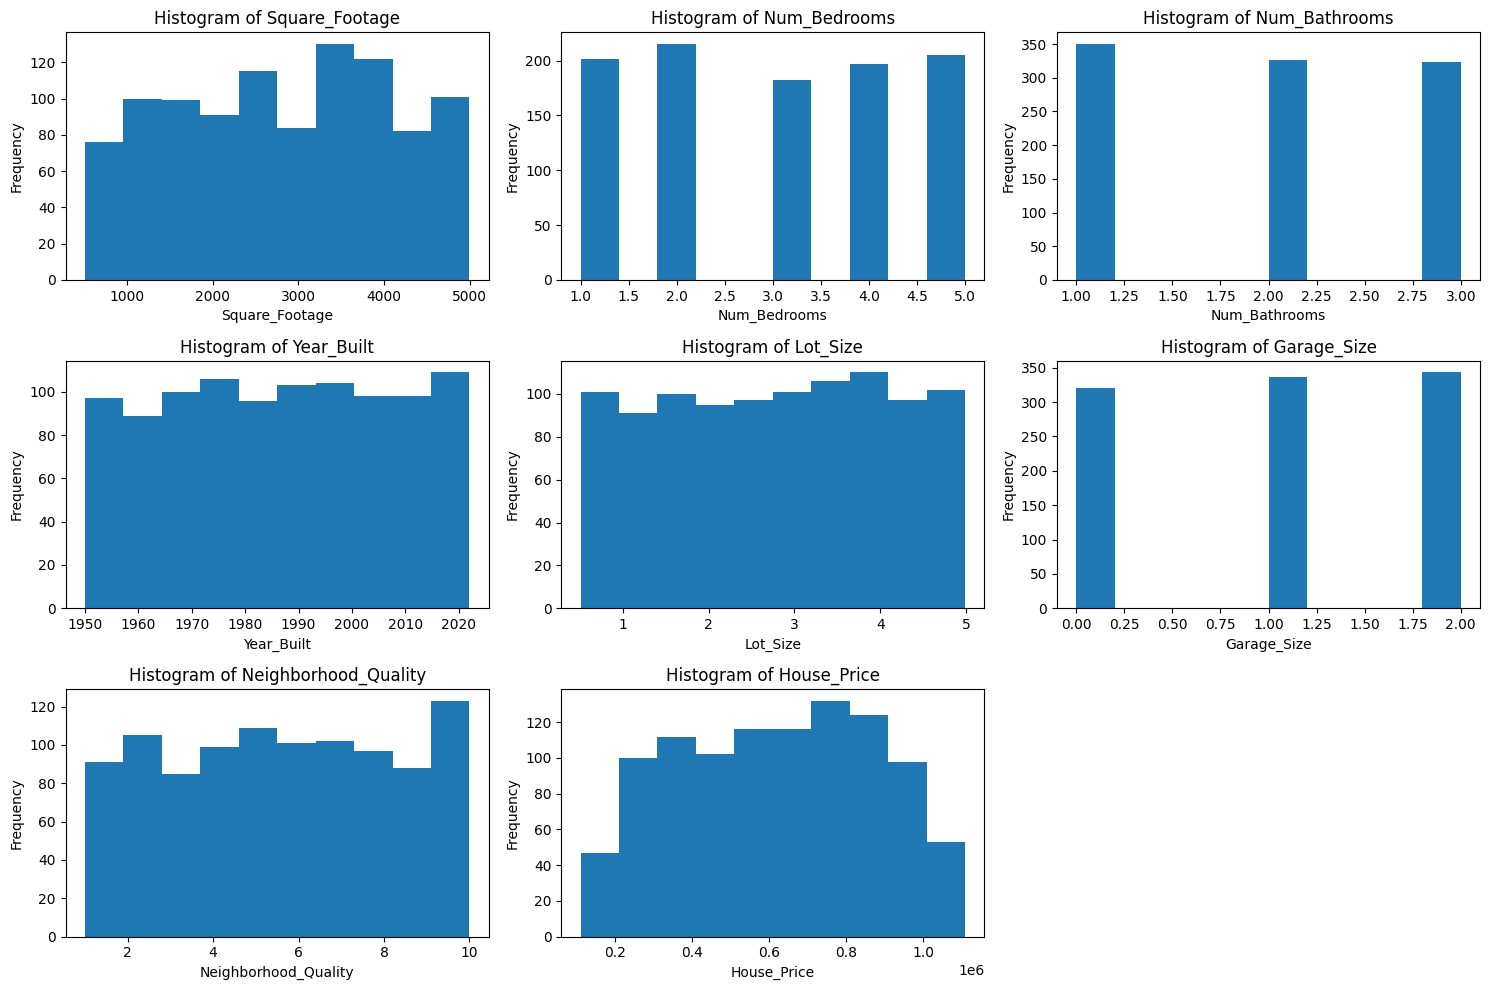

In [13]:
# Create histograms for each feature
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    plt.hist(df[col], bins=10)  # Adjust the number of bins as needed
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Dapat dilihat bahwa dataset memiliki distribusi yang rata. Tiga fitur (Num_Bedrooms, Num_Bathrooms, Garage_Size) memiliki distribusi yang terlihat agak aneh karena rentang nilai diskrit mereka yang kecil, namun distribusi mereka juga rata.

**Multivariate Analysis**

Menggunakan teknik multivariate untuk menunjukkan hubungan antara dua atau lebih variabel pada data.

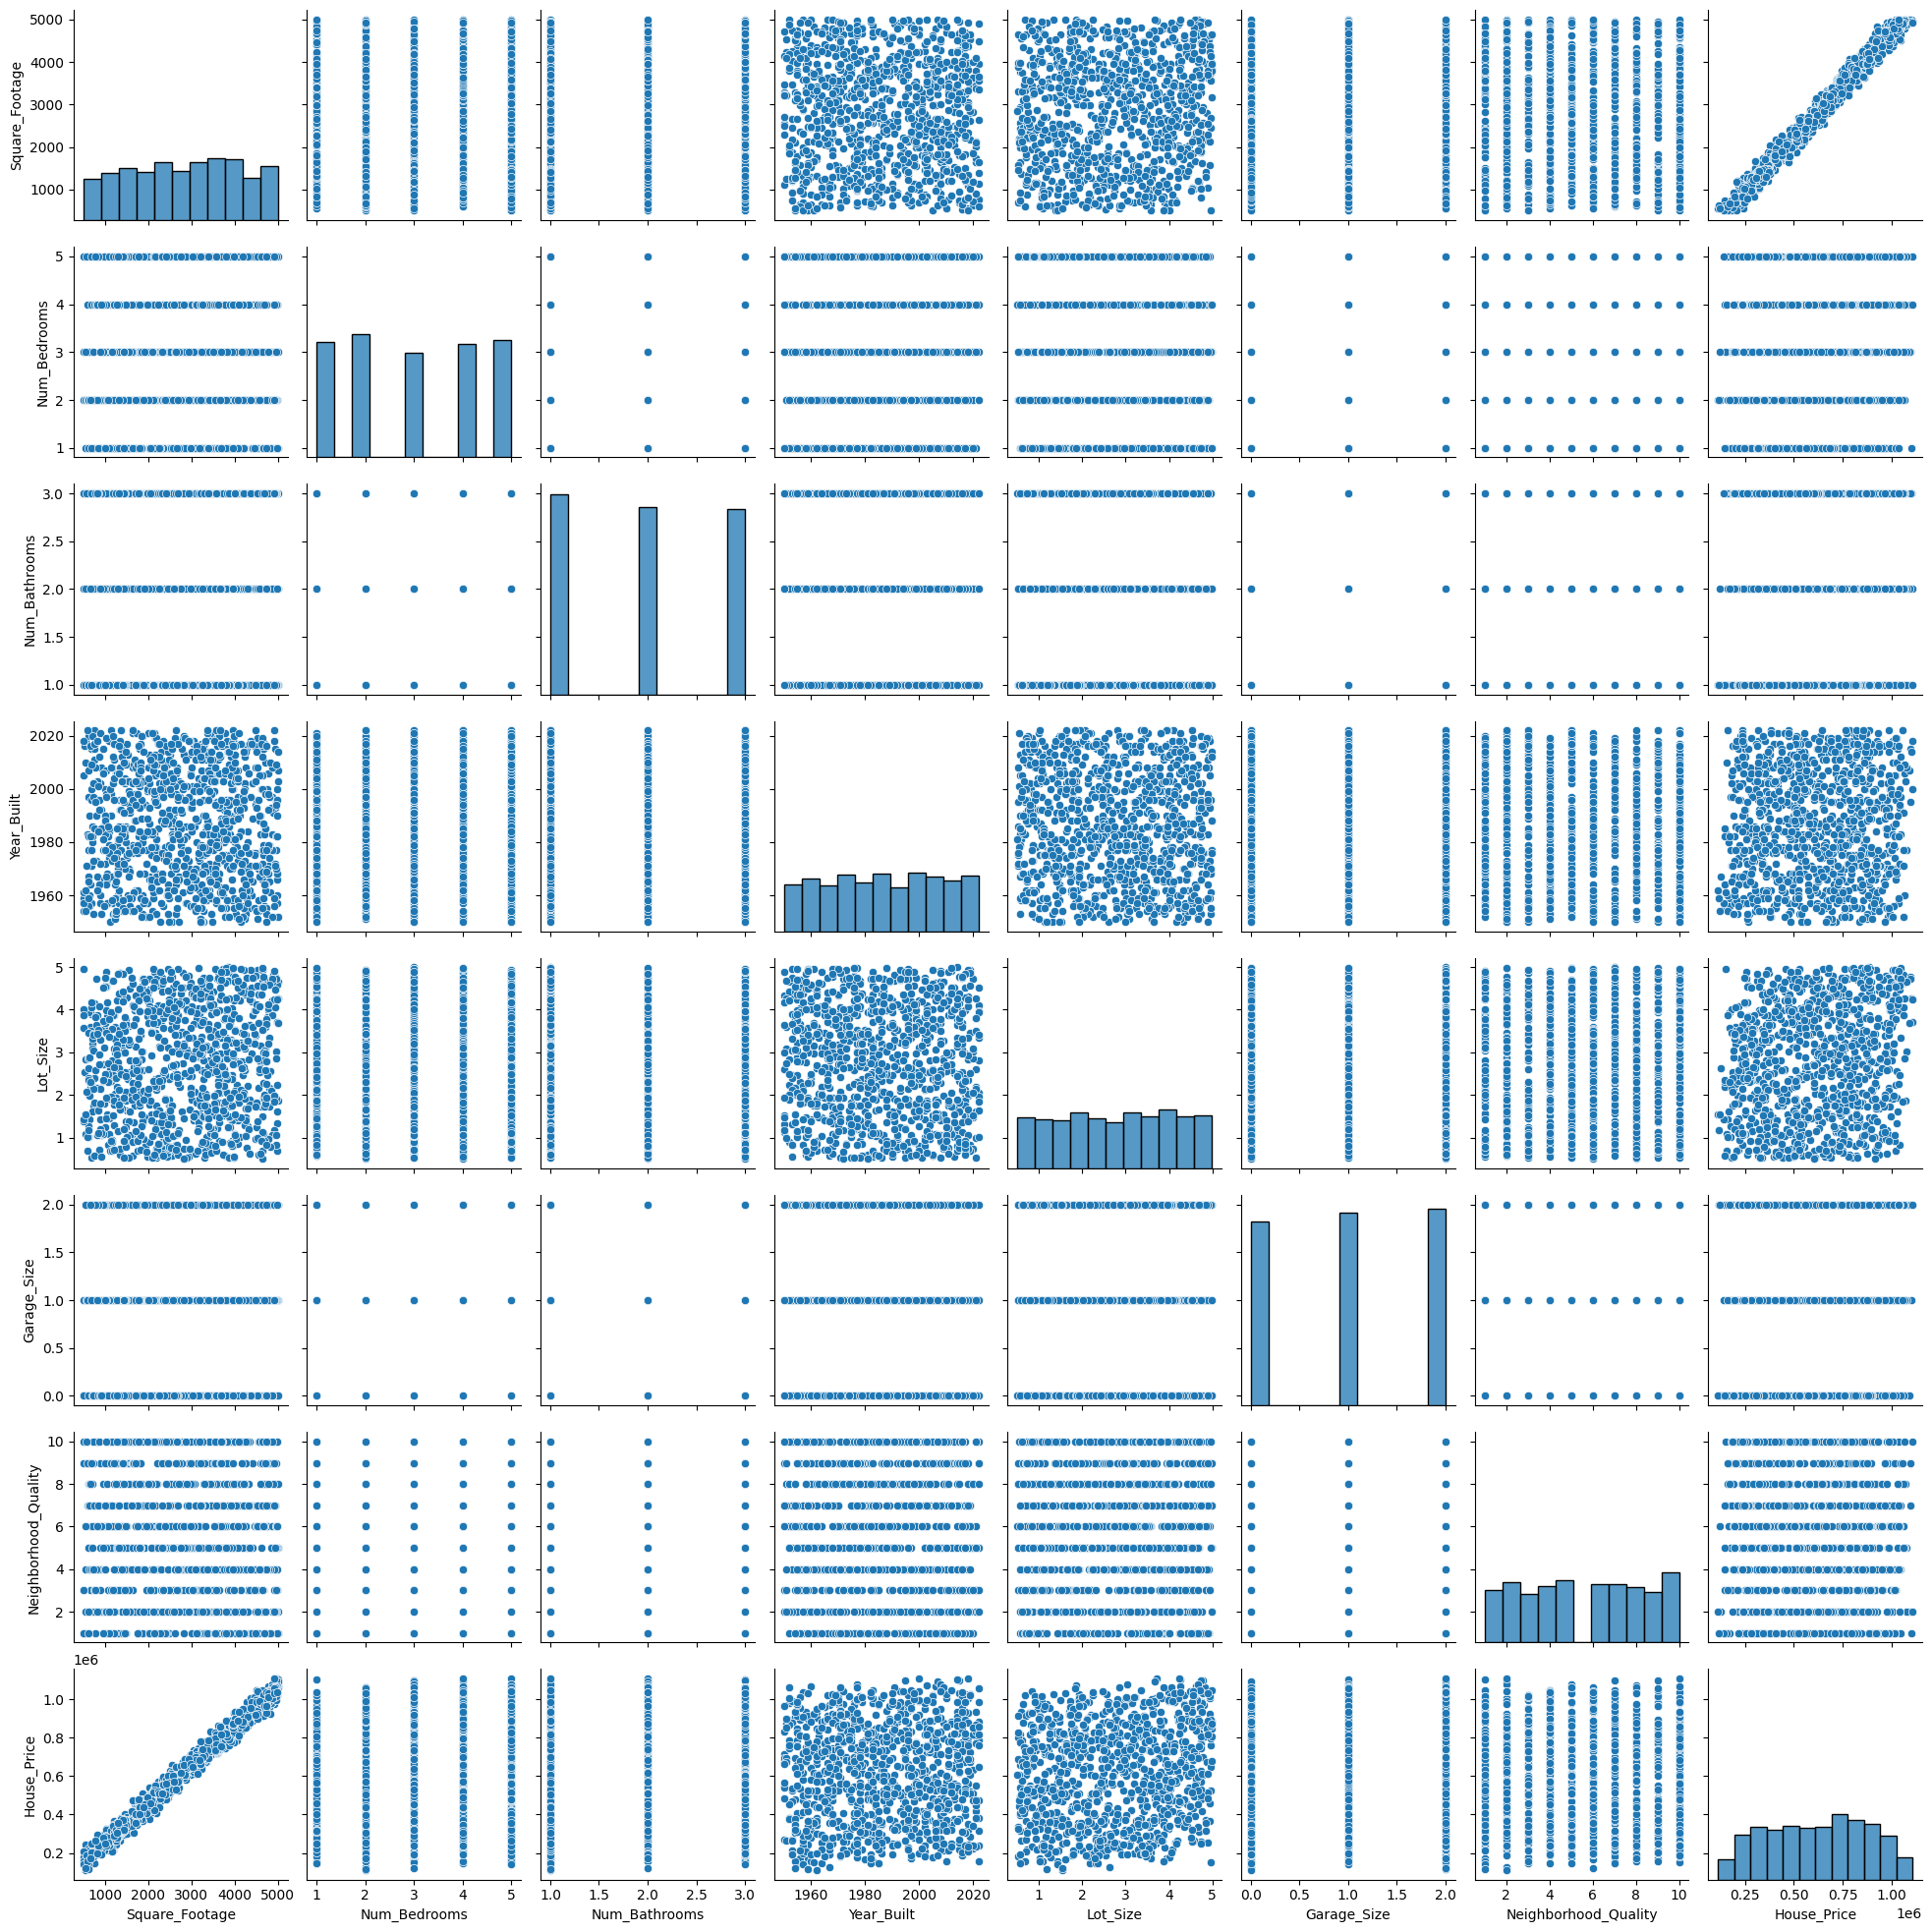

In [14]:
# Use pairplot to find the relationship between data
sns.pairplot(df)
plt.show()

Dari pairplot, kita mendapatkan grafik hubungan antar fitur pada dataset. Kita paling tertarik pada baris paling bawah, yaitu hubungan tiap fitur dengan fitur target kita, House_Price.

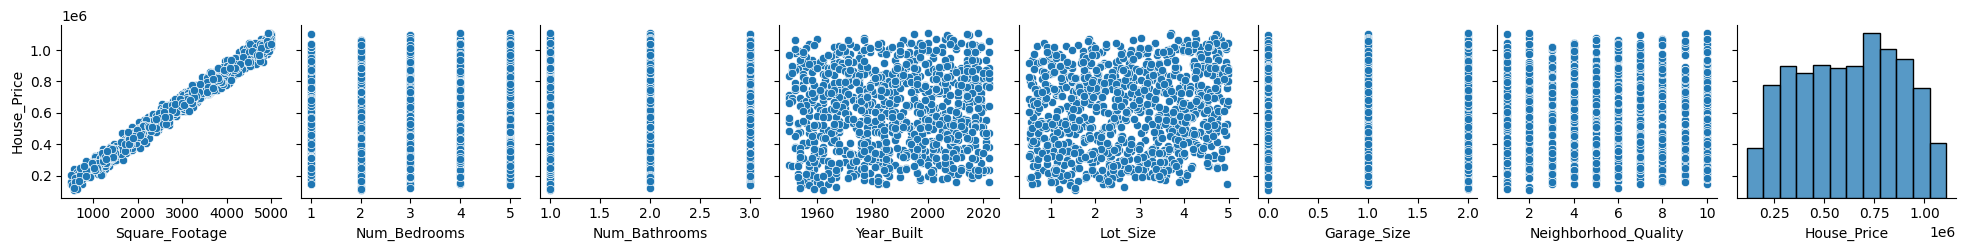

In [15]:
# Use pairplot to find the relationship of House_Price with every other feature
sns.pairplot(df, x_vars=df.columns, y_vars='House_Price')
plt.show()

Dapat dilihat bahwa Square_Footage memiliki korelasi positif yang kuat, dengan semua fitur lain memiliki korelasi yang lemah karena tidak membentuk pola yang positif atau negatif.

Text(0.5, 1.0, 'Correlation Matrix')

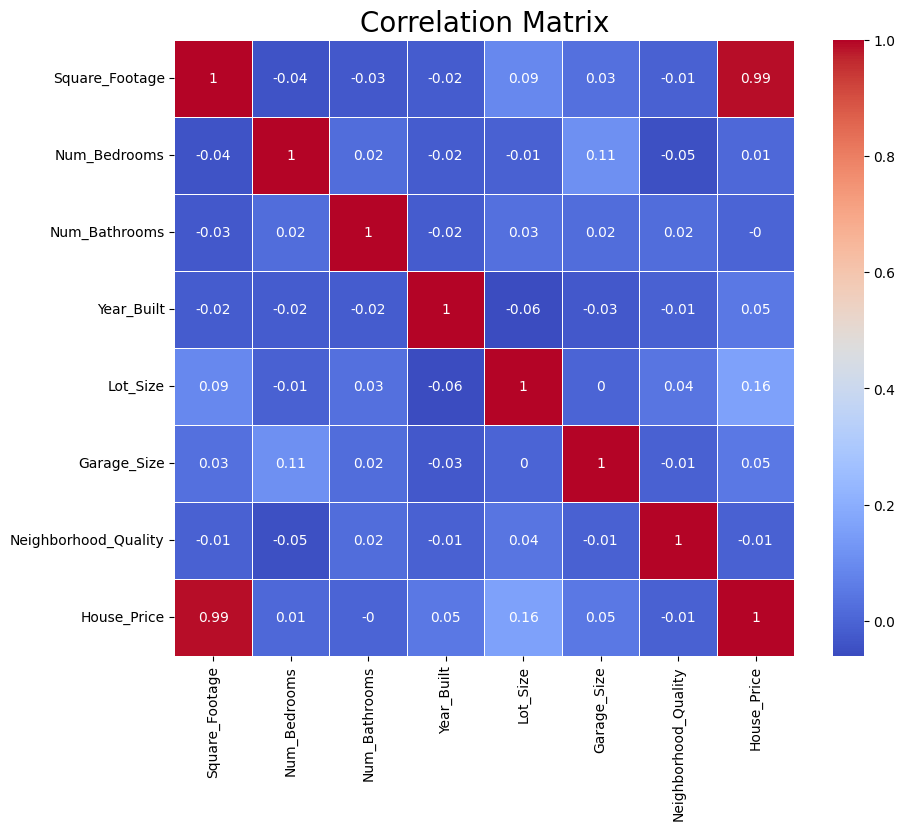

In [17]:
# Generate correlation matrix for all the features
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix", size=20)

Matriks korelasi yang kita buat mengonfirmasi pengamatan kita dari pairplot, dengan House_Price memiliki korelasi sangat tinggi (0.99) dengan Square_Footage, dan korelasi lemah dengan semua fitur lain. Bagi fitur dengan korelasi sangat kecil (<=0.01), kita akan melakukan drop.

In [18]:
# Drop low correlation columns
df = df.drop(['Num_Bedrooms', 'Num_Bathrooms', 'Neighborhood_Quality'], axis=1)

In [19]:
# Show dataframe with dropped columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Square_Footage  1000 non-null   int64  
 1   Year_Built      1000 non-null   int64  
 2   Lot_Size        1000 non-null   float64
 3   Garage_Size     1000 non-null   int64  
 4   House_Price     1000 non-null   float64
dtypes: float64(2), int64(3)
memory usage: 39.2 KB


# Data Preparation

Data preparation merupakan tahapan penting dalam proses pengembangan model machine learning. Ini adalah tahap di mana kita melakukan proses transformasi pada data sehingga menjadi bentuk yang cocok untuk proses pemodelan.

**Train-Test Split**

Disini kita membagi data menjadi set training dan test, dengan rasio yang digunakan berupa 80/20, yang berarti 80 persen data digunakan untuk pelatihan, dan 20 untuk pengujian.

In [21]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X = df.drop('House_Price', axis=1)
y = df['House_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80/20 split with random state

# Print number of samples in the datasets
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 1000
Total # of sample in train dataset: 800
Total # of sample in test dataset: 200


**Standardisasi Data**

Algoritma machine learning memiliki performa lebih baik dan konvergen lebih cepat ketika dimodelkan pada data dengan skala relatif sama atau mendekati distribusi normal. Proses scaling dan standarisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma.

Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan, yang pada proyek ini menggunakan teknik StandarScaler dari library Scikitlearn.

StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi.  StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.

Untuk menghindari kebocoran informasi pada data uji, kita hanya akan menerapkan fitur standarisasi pada data latih. Kemudian, pada tahap evaluasi, kita akan melakukan standarisasi pada data uji.

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)

# Transform training data
X_train_scaled = scaler.transform(X_train)

# Model Development

Model development adalah tahapan di mana kita menggunakan algoritma machine learning untuk menjawab problem statement dari tahap business understanding.

Pada tahap ini, kita akan mengembangkan model machine learning dengan tiga algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Ketiga algoritma yang akan kita gunakan adalah:

- K-Nearest Neighbor
- Random Forest
- Boosting Algorithm

Pertama kita akan menyiapkan dataframe untuk analisis ketiga model nantinya, menggunakan metrik MSE, MAE, dan R2.

In [26]:
# Prepare dataframe for model analysis
models = pd.DataFrame(index=['train_mse', 'test_mse', 'train_mae', 'test_mae', 'train_r2', 'test_r2'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

Lalu kita akan melatih ketiga algoritma menggunakan data pada train set. Random Forest dan AdaBoost tidak peduli skala seperti KNN, maka set train mereka tidak menggunakan set yang distandardisasi.

In [27]:
# Train the three machine learning algorithms on the train set
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

# KNN
knn = KNeighborsRegressor()
knn.fit(X_train_scaled, y_train)

# Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train) # No need for standardized data

# AdaBoost
ada = AdaBoostRegressor()
ada.fit(X_train, y_train) # No need for standardized data

AdaBoostRegressor()

# Evaluasi Model

Pada tahap ini, kita akan mengevaluasi performa ketiga model menggunakan metrik Mean Square Error (MSE), Mean Absolute Error (MAE), dan R2. Sebelum pengujian menggunakan test set, kita harus melakukan standardisasi dengan scaler yang sama seperti pada train set, agar data berskala sama.

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate KNN model
y_pred_knn_train = knn.predict(X_train_scaled)
X_test_scaled = scaler.transform(X_test) # Standardize test set with same scaling as train set
y_pred_knn_test = knn.predict(X_test_scaled)

models.loc['train_mse', 'KNN'] = mean_squared_error(y_train, y_pred_knn_train)
models.loc['test_mse', 'KNN'] = mean_squared_error(y_test, y_pred_knn_test)
models.loc['train_mae', 'KNN'] = mean_absolute_error(y_train, y_pred_knn_train)
models.loc['test_mae', 'KNN'] = mean_absolute_error(y_test, y_pred_knn_test)
models.loc['train_r2', 'KNN'] = r2_score(y_train, y_pred_knn_train)
models.loc['test_r2', 'KNN'] = r2_score(y_test, y_pred_knn_test)

# Evaluate Random Forest model
y_pred_rf_train = rf.predict(X_train)
y_pred_rf_test = rf.predict(X_test)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_train, y_pred_rf_train)
models.loc['test_mse', 'RandomForest'] = mean_squared_error(y_test, y_pred_rf_test)
models.loc['train_mae', 'RandomForest'] = mean_absolute_error(y_train, y_pred_rf_train)
models.loc['test_mae', 'RandomForest'] = mean_absolute_error(y_test, y_pred_rf_test)
models.loc['train_r2', 'RandomForest'] = r2_score(y_train, y_pred_rf_train)
models.loc['test_r2', 'RandomForest'] = r2_score(y_test, y_pred_rf_test)

# Evaluate AdaBoost model
y_pred_ada_train = ada.predict(X_train)
y_pred_ada_test = ada.predict(X_test)

models.loc['train_mse', 'Boosting'] = mean_squared_error(y_train, y_pred_ada_train)
models.loc['test_mse', 'Boosting'] = mean_squared_error(y_test, y_pred_ada_test)
models.loc['train_mae', 'Boosting'] = mean_absolute_error(y_train, y_pred_ada_train)
models.loc['test_mae', 'Boosting'] = mean_absolute_error(y_test, y_pred_ada_test)
models.loc['train_r2', 'Boosting'] = r2_score(y_train, y_pred_ada_train)
models.loc['test_r2', 'Boosting'] = r2_score(y_test, y_pred_ada_test)

models

,KNN,RandomForest,Boosting
train_mse,1379094432.787155,81912686.95175,880410352.054793
test_mse,2285279964.636393,476631737.055197,948741444.830329
train_mae,29263.346088,7057.040997,24261.081325
test_mae,38271.001851,17970.394885,25087.878261
train_r2,0.978511,0.998724,0.986281
test_r2,0.964547,0.992606,0.985281


Evaluasi dilakukan dengan ketiga metrik pada set train dan test. Dapat dilihat bahwa ketiga model mengalami peningkatan MSE dan MAE pada test set dibandingkan dengan train set, yang merupakan hal normal. Performa Random Forest paling baik, namun performa Adaboost paling konsisten pada train dan test set. Perubahan R2 dari train ke test sangat kecil bagi ketiga model, menandakan model tidak overfitting.

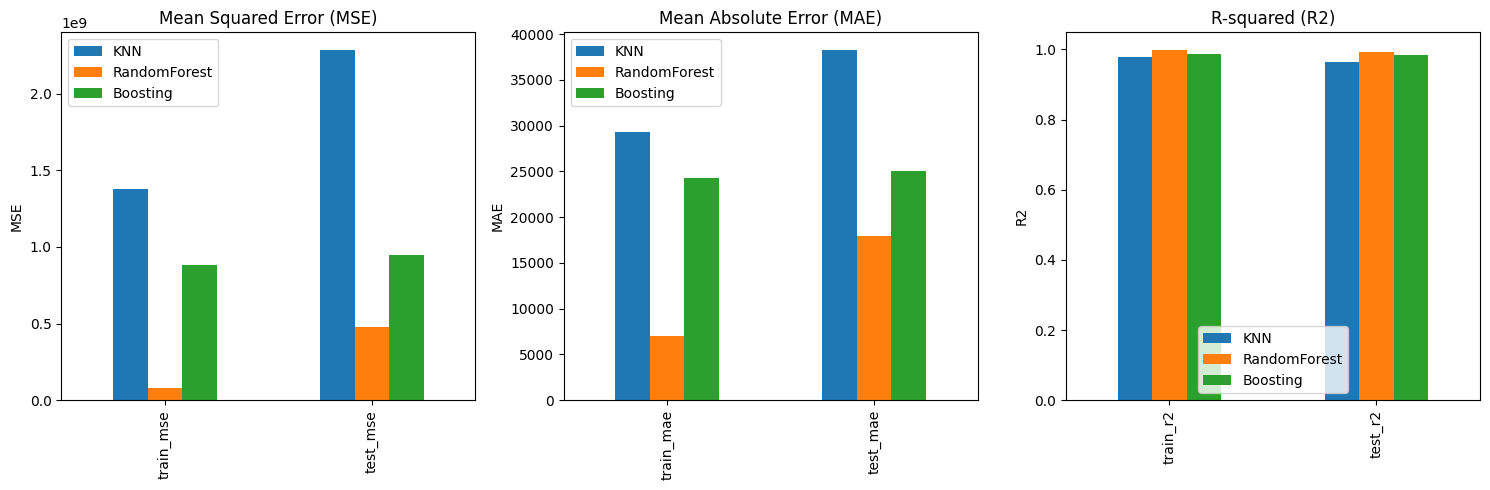

In [31]:
# Plot the model performance metrics
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Mean Squared Error (MSE)
models.loc[['train_mse', 'test_mse']].plot(kind='bar', ax=axes[0])
axes[0].set_title('Mean Squared Error (MSE)')
axes[0].set_ylabel('MSE')

# Mean Absolute Error (MAE)
models.loc[['train_mae', 'test_mae']].plot(kind='bar', ax=axes[1])
axes[1].set_title('Mean Absolute Error (MAE)')
axes[1].set_ylabel('MAE')

# R-squared (R2)
models.loc[['train_r2', 'test_r2']].plot(kind='bar', ax=axes[2])
axes[2].set_title('R-squared (R2)')
axes[2].set_ylabel('R2')

plt.tight_layout()
plt.show()

Maka dapat dilihat dari ketiga grafik diatas, bahwa performa model Random Forest adalah yang paling baik, dengan MAE dan MSE yang paling kecil, dan R2 yang paling besar. AdaBoost memiliki performa kedua paling baik, dan KNN menempati posisi terakhir, dengan performa paling buruk.

In [35]:
# Calculate the mean of house prices
mean_house_price = np.mean(df['House_Price'])

# Get RMSE (Root Mean Square Error) values of test set
rmse_knn = np.sqrt(models.loc['test_mse', 'KNN'])
rmse_rf = np.sqrt(models.loc['test_mse', 'RandomForest'])
rmse_ada = np.sqrt(models.loc['test_mse', 'Boosting'])

# Calculate the proportion
proportion_knn = rmse_knn / mean_house_price
proportion_rf = rmse_rf / mean_house_price
proportion_ada = rmse_ada / mean_house_price

print(f"Proportion of KNN RMSE to mean of house price: {proportion_knn}")
print(f"Proportion of RF RMSE to mean of house price: {proportion_rf}")
print(f"Proportion of AB RMSE to mean of house price: {proportion_ada}")

Proportion of KNN RMSE to mean of house price: 0.07724610288681014
Proportion of RF RMSE to mean of house price: 0.03527754468484738
Proportion of AB RMSE to mean of house price: 0.04977150904574513


Pada kode diatas, MSE diakar menjadi RMSE agar skalanya setara dengan data asli. Dapat dilihat bahwa proporsi RMSE sangat kecil jika dibandingkan dengan mean dari data harga rumah, yang menunjukkan bahwa akar dari selisih nilai prediksi dengan nilai sebenarnya yang dikuadrat sangat kecil dibandingkan mean harga rumah.

In [36]:
# Get MAE values of test set
mae_knn = models.loc['test_mae', 'KNN']
mae_rf = models.loc['test_mae', 'RandomForest']
mae_ada = models.loc['test_mae', 'Boosting']

# Calculate the proportion
proportion_knn = mae_knn / mean_house_price
proportion_rf = mae_rf / mean_house_price
proportion_ada = mae_ada / mean_house_price

print(f"Proportion of KNN MAE to mean of house price: {proportion_knn}")
print(f"Proportion of RF MAE to mean of house price: {proportion_rf}")
print(f"Proportion of AB MAE to mean of house price: {proportion_ada}")

Proportion of KNN MAE to mean of house price: 0.06184102843486997
Proportion of RF MAE to mean of house price: 0.02903785235066378
Proportion of AB MAE to mean of house price: 0.04053879224105463


Proporsi MAE terhadap mean juga sangat kecil, yang menunjukkan bahwa selisih nilai prediksi dengan nilai sebenarnya sangat kecil dibandingkan mean harga rumah.

In [39]:
# Create a DataFrame with the first 5 samples from the test set
comparison_df = pd.DataFrame({
    'Actual': y_test.iloc[:5],
    'KNN': y_pred_knn_test[:5],
    'RandomForest': y_pred_rf_test[:5],
    'AdaBoost': y_pred_ada_test[:5]
})

# Reset the index for better presentation
comparison_df = comparison_df.reset_index(drop=True)

# Print the comparison DataFrame
comparison_df

,Actual,KNN,RandomForest,AdaBoost
0,9.010005e+05,822241.955935,8.554400e+05,8.536974e+05
1,4.945375e+05,516527.861433,5.084208e+05,5.034586e+05
2,9.494042e+05,975953.974347,9.498840e+05,9.706723e+05
3,1.040389e+06,978179.212127,1.047002e+06,1.033746e+06
4,7.940100e+05,769437.013846,8.125074e+05,7.876537e+05


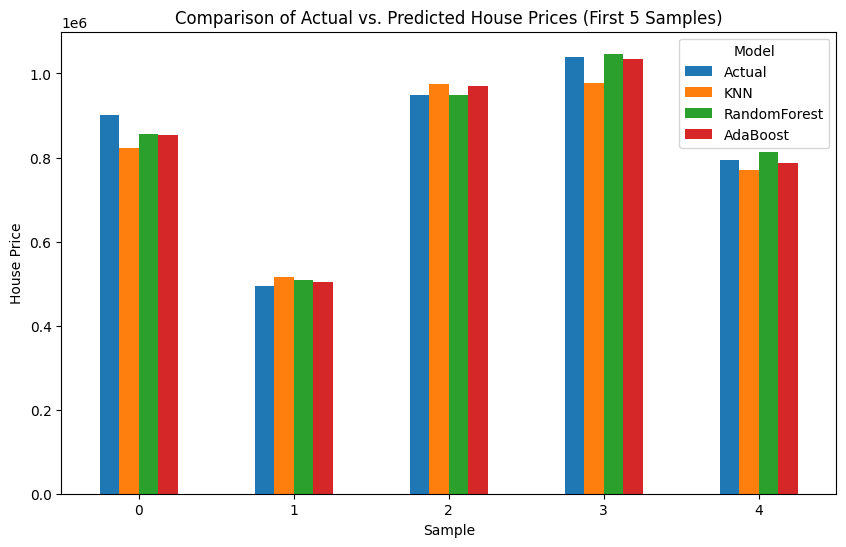

In [40]:
# Make chart to graphically show the actual vs predicted values
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Actual vs. Predicted House Prices (First 5 Samples)')
plt.xlabel('Sample')
plt.ylabel('House Price')
plt.xticks(rotation=0)
plt.legend(title='Model')
plt.show()

Tabel dan grafik diatas menunjukkan bahwa selisih memang kecil dengan nilai asli seperti ditandakan oleh proporsi RMSE dan MAE, dan tingginya nilai R2.